In [1]:
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt
import glob

cols=plt.rcParams['axes.prop_cycle'].by_key()['color']

import sys
sys.path.append('functions/')

import importlib
import myfuncs as myf
import Hf_Q as HF_Q

importlib.reload(myf)
importlib.reload(HF_Q)


mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize'] = 18
mpl.rcParams['figure.titlesize'] = 24
mpl.rcParams['axes.titlesize'] = 22
mpl.rcParams['lines.linewidth'] = 2

In [2]:
U_arr=[]
for ss in np.array(glob.glob('../data/manual_runs/run_U_*')):
    U_arr.append(float(ss[26:]))
U_arr=np.array(U_arr)
order=np.argsort(U_arr)
U_arr[order]
#
#
data_l = []
for ss in np.array(glob.glob('../data/manual_runs/run_U_*'))[order]:
    U_str=ss[26:]
    UU=float(U_str)
    data_dict = np.load(ss+'/data_dict.npy',allow_pickle='TRUE').item()
    data_dict['U'] = UU
    data_l.append(data_dict)

#data_l = np.array(data_l)

data = {}
for k in data_l[0].keys():
  data[k] = np.array([data[k] for data in data_l])

In [3]:
#exchange x and y
#_='''
U0=6.25
for U0 in [6,6.25]:
    arg=np.argmin(abs(data['U']-U0))
    print(data['U'][arg],U0)
    #mus
    t=data['mupx'][arg]+0
    data['mupx'][arg]=data['mupy'][arg]+0
    data['mupy'][arg]=t+0
    #Qs
    t=data['Qx'][arg]+0
    data['Qx'][arg]=data['Qy'][arg]+0
    data['Qy'][arg]=t+0
    #Ds
    t=data['Dpx'][arg]+0
    data['Dpx'][arg]=data['Dpy'][arg]+0
    data['Dpy'][arg]=t+0
#'''

6.0 6
6.25 6.25


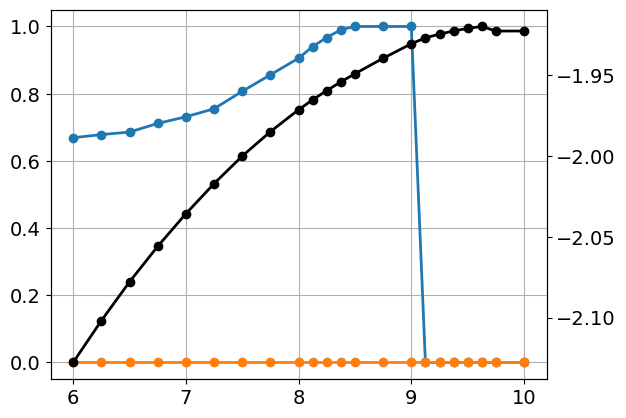

In [4]:

plt.plot(data['U'],abs(data['Qx'])/np.pi,'o-')
plt.plot(data['U'],abs(data['Qy'])/np.pi,'o-')
plt.grid()
ax2=plt.twinx()

ax2.plot(data['U'],data['F'],'o-',c='black')
#ax2.plot(data['U'],data['mu'],'o-',c='r')


In [5]:
U0=6
arg=np.argmin(abs(data['U']-U0))
print(data['Qx'][arg]/np.pi)
print(abs(data['Dpx'][arg]))

0.6688196059226991
1.3589331386974919


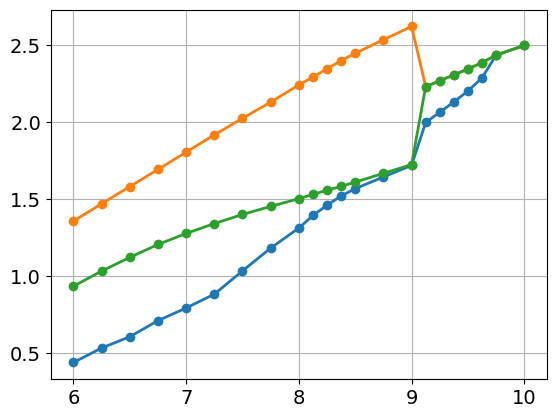

In [6]:
# plt.plot(data['U'],abs(data['Dd'])/data['U'],'o-')
# plt.plot(data['U'],abs(data['Dpx'])/data['U'],'o-')
# plt.plot(data['U'],abs(data['Dpy'])/data['U'],'o-')
plt.plot(data['U'],abs(data['Dd']),'o-')
plt.plot(data['U'],abs(data['Dpx']),'o-')
plt.plot(data['U'],abs(data['Dpy']),'o-')
plt.grid()

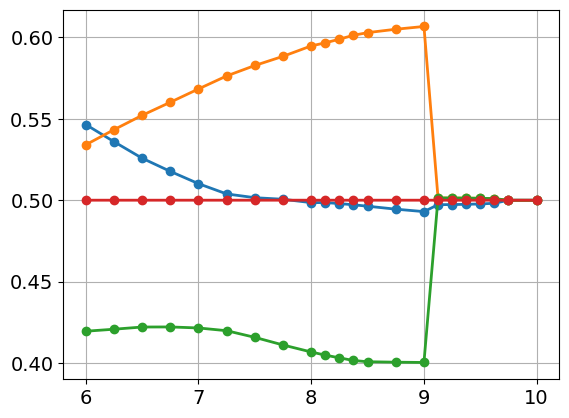

In [7]:
nd=-2*(data['mud']-data['mu'])/data['U']
npx=-2*(data['mupx']-data['mu'])/data['U']
npy=-2*(data['mupy']-data['mu'])/data['U']

plt.plot(data['U'],nd,'o-')
plt.plot(data['U'],npx,'o-')
plt.plot(data['U'],npy,'o-')
plt.plot(data['U'],(nd+npx+npy)/3,'o-')
plt.grid()

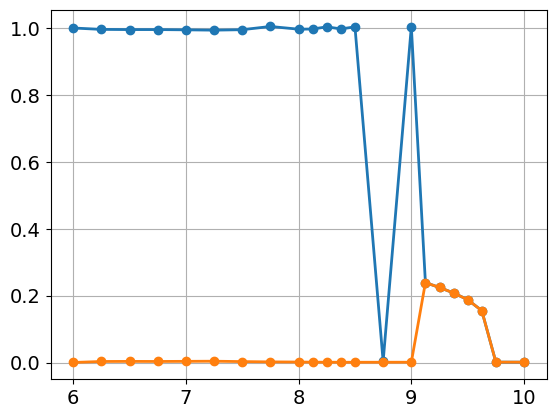

In [8]:
def my_angle(x):
    #return np.mod(x+np.pi,2*np.pi)-np.pi
    return abs(x)
th_x = my_angle(np.angle(data['Dpx'])-np.angle(data['Dd']))
th_y = my_angle(np.angle(data['Dpy'])-np.angle(data['Dd']))
#plt.plot(data['U'],th_x/np.pi,'o-')
#plt.plot(data['U'],th_y/np.pi,'o-')
plt.plot(data['U'],th_x/np.pi,'o-')
plt.plot(data['U'],th_y/np.pi,'o-')
#plt.plot(data['U'],abs(th_x+th_y)/np.pi,'o-')
#plt.plot(data['U'],th_y/np.pi,'o-')
plt.grid()

In [9]:
U0=9.625
arg=np.argmin(abs(data['U']-U0))

Dd=data['Dd'][arg]
phid=np.angle(Dd)
phase=np.exp(-1j*phid)
Dpx=data['Dpx'][arg]*phase
Dpy=data['Dpy'][arg]*phase

print(np.angle(Dpx)/np.pi,np.angle(Dpy)/np.pi)

-0.15509583930365117 0.15509583930365112


0 7 6
6
1 7 6.5
2 7 7
3 7 7.5
4 7 8
5 7 8.5
6 7 9
9


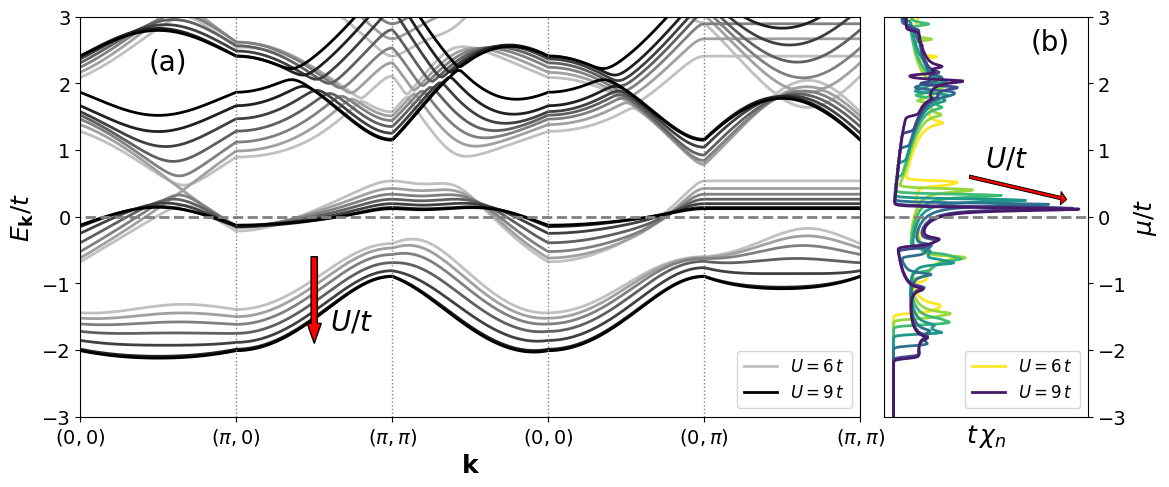

In [10]:
def lorentz(x,gamma):
    return -1/np.pi*(1./(x+1j*gamma)).imag
    
Nk=100
pars = dict(t=1,U=0,J=0,t_pxpy=0,t_pp=0,t_dd=0,J_pxpy=0)
OBJ = HF_Q.HF_qQ(Nk,pars)

fig=plt.figure(figsize=(12,5))
left, width = 0.07, 0.65
bottom, height = 0.1, .8
bottom_h = left_h = left+width+0.02

rect_cones = [left, bottom, width, height]
rect_box = [left_h, bottom, 0.17, height]

ax = plt.axes(rect_cones)
ax2 = plt.axes(rect_box)
ax2.sharey(ax)


Us=[6,6.5,7,7.5,8,8.5,9]
U_color = 10*np.array(Us) 
dUcolor = U_color[0]-2
U_color -= dUcolor
Ncolors=int(np.max(U_color))
colors = plt.cm.viridis(1/Ncolors*np.linspace(0,Ncolors,Ncolors+1))[::-1]

U_color = 10*np.array(Us) 
dUcolor = U_color[0]
U_color -= dUcolor
Ncolors=int(np.max(U_color))
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["black","silver"])
colors2 = cmap(1/Ncolors*np.linspace(0,Ncolors,Ncolors+1))[::-1]

for cnt,U0 in enumerate(Us):
    ii=np.argmin(abs(data['U']-U0))
    
    
    Dd=data['Dd'][ii]
    Dpx=data['Dpx'][ii]
    Dpy=data['Dpy'][ii]
    mud=data['mud'][ii]
    mupx=data['mupx'][ii]
    mupy=data['mupy'][ii]
    Qx=data['Qx'][ii]
    Qy=data['Qy'][ii]
    
    #print(Qx,Qy)
    #
    scpp=dict(Dd=Dd,Dpx=Dpx,Dpy=Dpy,mud=mud,mupx=mupx,mupy=mupy)
    
    Ek,phik,_ = OBJ.make_H(scpp,[Qx,Qy])
    
    
    mus = np.linspace(-3,3,500)
    ns = np.zeros(mus.shape)
    
    for jj,muu in enumerate(mus):
       ns[jj] = OBJ.filling_fast(Ek-muu,T=0.01)
    
    compr = np.diff(ns) / abs(mus[0]-mus[1])
    
    #oms = np.linspace(np.min(Ek)*1.02,np.max(Ek)*1.02,500)
    #sp_fun = np.zeros(oms.shape)
    #for cnt,om in enumerate(oms):
    #    sp_fun[cnt] = np.sum(lorentz(om-Ek,0.025).flatten())/OBJ.Nk**2
    #
    
    #plt.title(r'$U=%.2f\,t$'%U0)
    #print(OBJ.filling_fast(Ek,T=0.01))
    #
    k0 = OBJ.Nk//2-1
    kP = OBJ.Nk-1
    OBJ.klin[k0]
    Epath=np.concatenate((Ek[k0:,k0,:],Ek[kP,k0+1:,:]),axis=0)
    Epath = np.concatenate((Epath,np.einsum('xxl->xl',Ek[k0:-1,k0:-1,:])[::-1,:]),axis=0)
    Epath = np.concatenate((Epath,Ek[k0,k0+1:,:]),axis=0)
    Epath = np.concatenate((Epath,Ek[k0+1:,kP,:]),axis=0)
    
    print(cnt,len(Us),U0)
    if (cnt==0 or cnt==len(Us)-1):
        lbl=r'$U=%.0f\,t$'%U0
        print(U0)
    else:
        lbl=''

    for l in range(5):
        ax.plot(Epath[:,l],color=colors2[int(10*U0-dUcolor)])
    ax.plot(Epath[:,5],color=colors2[int(10*U0-dUcolor)],label=lbl)
    ax2.plot(compr,mus[:-1],color=colors[int(10*U0-dUcolor)],label=lbl)


ax.legend(fontsize=12,loc='lower right')
ax2.legend(fontsize=12,loc='lower right')
kpoints = [0,OBJ.Nk//2,OBJ.Nk,3/2*OBJ.Nk,2*OBJ.Nk,5/2*OBJ.Nk]
for vv in kpoints:
    ax.vlines(vv,-3,3,linestyles='dotted',color='gray',lw=1)
ax.set_ylim(-3,3)

xlim=ax.set_xlim()
ax.hlines(0,xlim[0],xlim[1],linestyles='dashed',color='gray')
ax.set_xlim(0,Epath.shape[0]-1)

ax.set_xticks(kpoints)
ax.set_xticklabels([r'$(0,0)$',r'$(\pi,0)$',r'$(\pi,\pi)$',r'$(0,0)$',r'$(0,\pi)$',r'$(\pi,\pi)$'])
#


ax2.yaxis.tick_right()
#ax2.yaxis.label_right()
ax2.set_xticks([])
    
ax2.set_ylim(-3,3)
xlim=ax2.get_xlim()
ax2.hlines(0,xlim[0],xlim[1],linestyles='dashed',color='gray')
ax2.set_xlim(xlim)

ax.set_xlabel(r'$\mathbf{k}$')
ax.set_ylabel(r'$E_\mathbf{k}/t$')

ax2.set_xlabel(r'$t\,\chi_n$')
ax2.yaxis.set_label_position("right")
ax2.set_ylabel(r'$\mu/t$')

arrow_pars=dict(width=0.05,length_includes_head=False,head_width=0.2,facecolor='red',linewidth=0.7)
ax2.arrow(2.5,0.6,3,-0.32,**arrow_pars,zorder=20,head_length=0.2)
ax2.annotate(r'$U/t$',(3,0.75),fontsize=20)

arrow_pars=dict(width=2,length_includes_head=False,head_width=4.5,facecolor='red',linewidth=1)
ax.arrow(75,-0.6,0,-1,**arrow_pars,zorder=20,head_length=0.3)
ax.annotate(r'$U/t$',(80,-1.7),fontsize=20)

ax.annotate('(a)',(22,2.2),fontsize=20)
ax2.annotate('(b)',(4.5,2.5),fontsize=20)

plt.savefig('../figures/Fig5.png',dpi=300,bbox_inches='tight')